#NAME - Saket Pratap Singh
#Roll No - 240909

#Importing the necessary libraries.....

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data=pd.read_csv("/content/movie.csv") #make sure to upload the csv file

In [ ]:
data.describe() #checking the counts...

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data.info()  #checking for null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [ ]:
data.nunique() #checking for dyplicates

,0
text,39723
label,2


In [ ]:
data=data.drop_duplicates() #dropping duplicate entries

In [ ]:
data.isnull().sum() #verify

,0
text,0
label,0


In [ ]:
print(data.groupby('label')['label'].count()) #checking data distribution among positive and negative responses

label
0    19815
1    19908
Name: label, dtype: int64


In [ ]:
data.shape #verifying data is updated

(39723, 2)

In [ ]:
#making the list of sentences word length

i=0
listoflen=[]
for i in range(39723):
  listoflen.append(len(data.iloc[i]['text']))


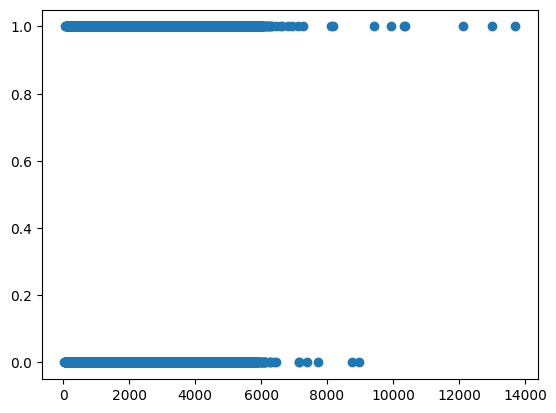

In [ ]:
#seeing the word length and label realtionship

plt.scatter(listoflen,data['label'])
plt.show()

In [ ]:
data['text']=data['text'].str.lower() #converting all sentences to lowercase

In [ ]:
data.head()

,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [ ]:
#making fuctions to remove urls and html tags in sentences using regex

import re
def remove_html_tags(text):
  pattern=re.compile('<.*?>')
  return pattern.sub(r'',text)


def remove_url(text):
  pattern=re.compile('https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

In [ ]:
#Applying the above defined functions

data['text']=data['text'].apply(remove_html_tags)
data['text']=data['text'].apply(remove_url)


In [ ]:
#creating a dictionary to of chat words

chat_words = {
    "BRB": "be right back",
    "LOL": "laughing out loud",
    "LMAO": "laughing my ass off",
    "ROFL": "rolling on the floor laughing",
    "OMG": "oh my god",
    "IDK": "i do not know",
    "BTW": "by the way",
    "TTYL": "talk to you later",
    "TTYS": "talk to you soon",
    "BBL": "be back later",
    "SMH": "shaking my head",
    "TBH": "to be honest",
    "IKR": "i know right",
    "IMO": "in my opinion",
    "IMHO": "in my humble opinion",
    "FYI": "for your information",
    "NP": "no problem",
    "WTF": "what the f***",
    "WTH": "what the heck",
    "AFK": "away from keyboard",
    "ASAP": "as soon as possible",
    "BFF": "best friends forever",
    "BDAY": "birthday",
    "GR8": "great",
    "THX": "thanks",
    "U": "you",
    "UR": "your",
    "R": "are",
    "PLZ": "please",
    "K": "okay",
    "OMW": "on my way",
    "G2G": "got to go",
    "HBU": "how about you",
}

In [ ]:
#making a  function to replace chat words via there full fomrs

def chat_conversion(text):
  new_text=[]
  for w in text.split():
    if w.upper() in chat_words:
      new_text.append(chat_words[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)

In [ ]:
data['text']=data['text'].apply(chat_conversion) #applying the above function

In [ ]:
!pip install emoji

In [ ]:
#A function to convert emoji to text representation via emoji library

import emoji
def handle_emoji(text):
  return emoji.demojize(text)


In [ ]:
exclude='!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~'
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
#making a function to remove punctuation
def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))

In [ ]:
#Handling emojis and punctuation

data['text']=data['text'].apply(handle_emoji)
data['text']=data['text'].apply(remove_punc)

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#making a fucntion to remove stop words

def remove_stopwords(text):
  new_text=[]
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x=new_text[:]
  new_text.clear()
  return " ".join(x)

In [ ]:
data['text']=data['text'].apply(remove_stopwords) #handling stop words

In [ ]:
#tokenizing text using nltk library

from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def krde_token(text):
  return word_tokenize(text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
data['text']=data['text'].apply(krde_token) #tokenizing

In [ ]:
data.head() #verify

,text,label
0,"[grew, b, 1965, watching, loving, thunderbirds...",0
1,"[put, movie, dvd, player, sat, coke, chips, ex...",0
2,"[people, know, particular, time, past, like, f...",0
3,"[even, though, great, interest, biblical, movi...",0
4,"[im, die, hard, dads, army, fan, nothing, ever...",1


In [ ]:
from nltk.stem.porter import PorterStemmer #Stemmer especially made for english language

In [ ]:
#making a fucntion to stem words usinig Porter Stemmer

def stem_words(words):
  stemmer=PorterStemmer()
  return [stemmer.stem(word) for word in words]

In [ ]:
data['stemmed_words']=data['text'].apply(stem_words) #Stemming...

In [ ]:
#making a function to Lemmetize words using WordNetLemmetizer from nltk

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data['lemmatize_words']=data['text'].apply(lemmatize_words) #lemmitizing

In [ ]:
data.head() #verify

,text,label,stemmed_words,lemmatize_words
0,"[grew, b, 1965, watching, loving, thunderbirds...",0,"[grew, b, 1965, watch, love, thunderbird, mate...","[grew, b, 1965, watching, loving, thunderbird,..."
1,"[put, movie, dvd, player, sat, coke, chips, ex...",0,"[put, movi, dvd, player, sat, coke, chip, expe...","[put, movie, dvd, player, sat, coke, chip, exp..."
2,"[people, know, particular, time, past, like, f...",0,"[peopl, know, particular, time, past, like, fe...","[people, know, particular, time, past, like, f..."
3,"[even, though, great, interest, biblical, movi...",0,"[even, though, great, interest, biblic, movi, ...","[even, though, great, interest, biblical, movi..."
4,"[im, die, hard, dads, army, fan, nothing, ever...",1,"[im, die, hard, dad, armi, fan, noth, ever, ch...","[im, die, hard, dad, army, fan, nothing, ever,..."


In [ ]:
data.to_csv('preprocessed_data.csv',index=False) #saving the processed data so we dont have to train it again and again

#Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data=pd.read_csv('/content/preprocessed_data.csv') #reading preprocessed data file .

In [ ]:
from sklearn.model_selection import train_test_split

Splitting the stemmed and lemmatized data individually

In [ ]:
x_train_stem, x_test_stem,y_train_stem, y_test_stem = train_test_split(data['stemmed_words'],data['label'] ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)
x_train_lem, x_test_lem,y_train_lem, y_test_lem = train_test_split(data['lemmatize_words'],data['label'] ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

Vectorizing the textual (tokenized) data using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=lambda x: x)
x_train_stem_cv = vectorizer.fit_transform(x_train_stem)
x_train_lem_cv = vectorizer.fit_transform(x_train_lem)
x_test_lem_cv = vectorizer.transform(x_test_lem)
x_test_stem_cv = vectorizer.transform(x_test_stem)

Vectorizing the textual (tokenized) data using TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer=lambda x: x)
x_train_stem_tfidf = tfidf.fit_transform(x_train_stem)
x_train_lem_tfidf = tfidf.fit_transform(x_train_lem)
x_test_lem_tfidf = tfidf.transform(x_test_lem)
x_test_stem_tfidf = tfidf.transform(x_test_stem)

Vectorizing the textual (tokenized) data using Word2Vec and Saving it into a model to re-use it .

In [ ]:
# from gensim.models import Word2Vec
# import ast


# # Prepare the corpus as a list of token lists
# corpus=[]
# for x in data['text']:
#   x = ast.literal_eval(x)
#   corpus.append(x)


# # Train the Word2Vec model with skip-gram (sg=1)


In [ ]:
# model_w2v = Word2Vec(
#     sentences=corpus,
#     vector_size=1000,   # size of word vectors
#     window=5,          # context window size
#     min_count=1,       # ignore words with total frequency lower than this
#     sg=1,              # use skip-gram (sg=1), CBOW is sg=0
#     workers=4,         # parallelism
#     epochs=10          # number of iterations
# )


In [ ]:
# model_w2v.save("my_word2vec.model")

Making some arrangements to ensure correct installation of gensim library to use its features.

NOTE : Run all these commands without restarting the session , restart it only after reachinf the cell marked for Flag to restart.

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [ ]:
!pip install --upgrade "scipy>=1.14.0"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.


In [ ]:
# Clean reinstall compatible versions to fix conflicts
!pip install --upgrade --force-reinstall \
    gensim \
    numpy==1.26.4 \
    pandas==2.2.2 \
    scipy==1.14.0


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of gensim to determine which version is compatible with other requirements. This could take a while.
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.7 MB/s eta 0:00

In [ ]:
!pip install --upgrade --force-reinstall numpy scipy pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.1 MB/s eta 0:00:00
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 44.6 MB/s eta 0:00:00
Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 7.0 MB/s eta 0:00:00
Using cached python_dateutil-2.9.0.post0-py2

In [ ]:
!pip install -U scipy

In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.26.4  # or another stable version


Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --force-reinstall scipy gensim


  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64

Now Restart Session and this time dont run the codes in between these cells aka the codes for ensuring proper installation of gensim.

Importing our Word2Vec Model

In [ ]:
from gensim.models import Word2Vec

w2v_model = Word2Vec.load("my_word2vec.model")

Importing Classifiers for Algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),  # needed for ROC-AUC
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "BernoulliNB": BernoulliNB()
}

#Running Algos on Stemmed and Count Vectorized data

In [ ]:
results = []

for name, model in models.items():
    model.fit(x_train_stem_cv, y_train_stem)
    y_pred = model.predict(x_test_stem_cv)
    y_proba = model.predict_proba(x_test_stem_cv)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test_stem, y_pred)
    f1 = f1_score(y_test_stem, y_pred)
    auc = roc_auc_score(y_test_stem, y_proba) if y_proba is not None else np.nan
    cm = confusion_matrix(y_test_stem, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "ROC-AUC": auc,
        "Confusion Matrix": cm
    })

    # Print per-model metrics
    print(f"\n📌 {name}")
    print(f"Accuracy     : {acc:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"ROC-AUC      : {auc:.4f}" if y_proba is not None else "ROC-AUC      : Not available")
    print(f"Confusion Matrix:\n{cm}")



📌 Random Forest
Accuracy     : 0.6182
F1 Score     : 0.6116
ROC-AUC      : 0.6586
Confusion Matrix:
[[3154 1779]
 [2013 2985]]

📌 SVM
Accuracy     : 0.6128
F1 Score     : 0.6250
ROC-AUC      : 0.6603
Confusion Matrix:
[[2882 2051]
 [1794 3204]]

📌 Logistic Regression
Accuracy     : 0.6298
F1 Score     : 0.6267
ROC-AUC      : 0.6752
Confusion Matrix:
[[3170 1763]
 [1913 3085]]

📌 BernoulliNB
Accuracy     : 0.5665
F1 Score     : 0.5713
ROC-AUC      : 0.5864
Confusion Matrix:
[[2758 2175]
 [2130 2868]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Running Algos on Stemmed and TFIDF data

In [ ]:
results_stem_tfidf = []

for name, model in models.items():
    model.fit(x_train_stem_tfidf, y_train_stem)
    y_pred = model.predict(x_test_stem_tfidf)
    y_proba = model.predict_proba(x_test_stem_tfidf)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test_stem, y_pred)
    f1 = f1_score(y_test_stem, y_pred)
    auc = roc_auc_score(y_test_stem, y_proba) if y_proba is not None else np.nan
    cm = confusion_matrix(y_test_stem, y_pred)

    results_stem_tfidf.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "ROC-AUC": auc,
        "Confusion Matrix": cm
    })

    # Print per-model metrics
    print(f"\n📌 {name}")
    print(f"Accuracy     : {acc:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"ROC-AUC      : {auc:.4f}" if y_proba is not None else "ROC-AUC      : Not available")
    print(f"Confusion Matrix:\n{cm}")



📌 Random Forest
Accuracy     : 0.6224
F1 Score     : 0.6194
ROC-AUC      : 0.6686
Confusion Matrix:
[[3130 1803]
 [1947 3051]]

📌 SVM
Accuracy     : 0.6293
F1 Score     : 0.6299
ROC-AUC      : 0.6783
Confusion Matrix:
[[3117 1816]
 [1865 3133]]

📌 Logistic Regression
Accuracy     : 0.6226
F1 Score     : 0.6259
ROC-AUC      : 0.6710
Confusion Matrix:
[[3048 1885]
 [1863 3135]]

📌 BernoulliNB
Accuracy     : 0.5665
F1 Score     : 0.5713
ROC-AUC      : 0.5864
Confusion Matrix:
[[2758 2175]
 [2130 2868]]


#Running Algos on Lemmitized and Count Vectorized data

In [ ]:
results_lem_cv = []

for name, model in models.items():
    model.fit(x_train_lem_cv, y_train_lem)
    y_pred = model.predict(x_test_lem_cv)
    y_proba = model.predict_proba(x_test_lem_cv)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test_lem, y_pred)
    f1 = f1_score(y_test_lem, y_pred)
    auc = roc_auc_score(y_test_lem, y_proba) if y_proba is not None else np.nan
    cm = confusion_matrix(y_test_lem, y_pred)

    results_lem_cv.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "ROC-AUC": auc,
        "Confusion Matrix": cm
    })

    # Print per-model metrics
    print(f"\n📌 {name}")
    print(f"Accuracy     : {acc:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"ROC-AUC      : {auc:.4f}" if y_proba is not None else "ROC-AUC      : Not available")
    print(f"Confusion Matrix:\n{cm}")



📌 Random Forest
Accuracy     : 0.6167
F1 Score     : 0.6097
ROC-AUC      : 0.6608
Confusion Matrix:
[[3151 1782]
 [2025 2973]]

📌 SVM
Accuracy     : 0.6079
F1 Score     : 0.6199
ROC-AUC      : 0.6510
Confusion Matrix:
[[2861 2072]
 [1822 3176]]

📌 Logistic Regression
Accuracy     : 0.6215
F1 Score     : 0.6196
ROC-AUC      : 0.6645
Confusion Matrix:
[[3110 1823]
 [1936 3062]]

📌 BernoulliNB
Accuracy     : 0.5693
F1 Score     : 0.5749
ROC-AUC      : 0.5886
Confusion Matrix:
[[2762 2171]
 [2106 2892]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Running Algos on Lemmetized and TFIDF data

In [ ]:
results_lem_tfidf = []

for name, model in models.items():
    model.fit(x_train_lem_tfidf, y_train_lem)
    y_pred = model.predict(x_test_lem_tfidf)
    y_proba = model.predict_proba(x_test_lem_tfidf)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test_lem, y_pred)
    f1 = f1_score(y_test_lem, y_pred)
    auc = roc_auc_score(y_test_lem, y_proba) if y_proba is not None else np.nan
    cm = confusion_matrix(y_test_lem, y_pred)

    results_lem_tfidf.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "ROC-AUC": auc,
        "Confusion Matrix": cm
    })

    # Print per-model metrics
    print(f"\n📌 {name}")
    print(f"Accuracy     : {acc:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"ROC-AUC      : {auc:.4f}" if y_proba is not None else "ROC-AUC      : Not available")
    print(f"Confusion Matrix:\n{cm}")



📌 Random Forest
Accuracy     : 0.6202
F1 Score     : 0.6198
ROC-AUC      : 0.6668
Confusion Matrix:
[[3085 1848]
 [1924 3074]]

📌 SVM
Accuracy     : 0.6208
F1 Score     : 0.6203
ROC-AUC      : 0.6676
Confusion Matrix:
[[3089 1844]
 [1922 3076]]

📌 Logistic Regression
Accuracy     : 0.6173
F1 Score     : 0.6211
ROC-AUC      : 0.6601
Confusion Matrix:
[[3015 1918]
 [1883 3115]]

📌 BernoulliNB
Accuracy     : 0.5693
F1 Score     : 0.5749
ROC-AUC      : 0.5886
Confusion Matrix:
[[2762 2171]
 [2106 2892]]


Making a function to Vectorize our data using the imported Word2Vec Model

In [ ]:
def sentence_to_vec(sentence, model, vector_size):
    vec = np.zeros(vector_size)
    count = 0
    for word in sentence:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    return vec / count if count != 0 else vec

#Running Algos on Stemmed and Word2Vec data

In [ ]:
X_train_vecs_stem = np.array([sentence_to_vec(sent, w2v_model, 1000) for sent in x_train_stem])
X_test_vecs_stem  = np.array([sentence_to_vec(sent, w2v_model, 1000) for sent in x_test_stem])

In [ ]:
results_stem_w2v = []

for name, model in models.items():
    model.fit(X_train_vecs_stem, y_train_stem)
    y_pred = model.predict(X_test_vecs_stem)
    y_proba = model.predict_proba(X_test_vecs_stem)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test_lem, y_pred)
    f1 = f1_score(y_test_lem, y_pred)
    auc = roc_auc_score(y_test_lem, y_proba) if y_proba is not None else np.nan
    cm = confusion_matrix(y_test_lem, y_pred)

    results_stem_w2v.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "ROC-AUC": auc,
        "Confusion Matrix": cm
    })

    # Print per-model metrics
    print(f"\n📌 {name}")
    print(f"Accuracy     : {acc:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"ROC-AUC      : {auc:.4f}" if y_proba is not None else "ROC-AUC      : Not available")
    print(f"Confusion Matrix:\n{cm}")



📌 Random Forest
Accuracy     : 0.5986
F1 Score     : 0.5995
ROC-AUC      : 0.6338
Confusion Matrix:
[[2962 1971]
 [2015 2983]]

📌 SVM
Accuracy     : 0.6068
F1 Score     : 0.6125
ROC-AUC      : 0.6515
Confusion Matrix:
[[2940 1993]
 [1912 3086]]

📌 Logistic Regression
Accuracy     : 0.6029
F1 Score     : 0.6072
ROC-AUC      : 0.6444
Confusion Matrix:
[[2938 1995]
 [1949 3049]]

📌 BernoulliNB
Accuracy     : 0.5791
F1 Score     : 0.5718
ROC-AUC      : 0.6056
Confusion Matrix:
[[2960 1973]
 [2207 2791]]


#Running Algos on Lemmetized and Word2Vec data

In [ ]:
X_train_vecs_lem = np.array([sentence_to_vec(sent, w2v_model, 1000) for sent in x_train_lem])
X_test_vecs_lem  = np.array([sentence_to_vec(sent, w2v_model, 1000) for sent in x_test_lem])

In [ ]:
results_lem_w2v = []

for name, model in models.items():
    model.fit(X_train_vecs_lem, y_train_lem)
    y_pred = model.predict(X_test_vecs_lem)
    y_proba = model.predict_proba(X_test_vecs_lem)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test_lem, y_pred)
    f1 = f1_score(y_test_lem, y_pred)
    auc = roc_auc_score(y_test_lem, y_proba) if y_proba is not None else np.nan
    cm = confusion_matrix(y_test_lem, y_pred)

    results_lem_w2v.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "ROC-AUC": auc,
        "Confusion Matrix": cm
    })

    # Print per-model metrics
    print(f"\n📌 {name}")
    print(f"Accuracy     : {acc:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"ROC-AUC      : {auc:.4f}" if y_proba is not None else "ROC-AUC      : Not available")
    print(f"Confusion Matrix:\n{cm}")



📌 Random Forest
Accuracy     : 0.5951
F1 Score     : 0.5974
ROC-AUC      : 0.6316
Confusion Matrix:
[[2927 2006]
 [2015 2983]]

📌 SVM
Accuracy     : 0.6105
F1 Score     : 0.6167
ROC-AUC      : 0.6458
Confusion Matrix:
[[2951 1982]
 [1886 3112]]

📌 Logistic Regression
Accuracy     : 0.6050
F1 Score     : 0.6111
ROC-AUC      : 0.6414
Confusion Matrix:
[[2926 2007]
 [1916 3082]]

📌 BernoulliNB
Accuracy     : 0.5849
F1 Score     : 0.5668
ROC-AUC      : 0.6130
Confusion Matrix:
[[3112 1821]
 [2301 2697]]
